In your final project – time to shine! – you'll use machine learning to predict whether a tumor is benign or malignant. 

NOTE: These data are not the same as the data we used before - those were a toy version and these are the real deal.

The data have a bunch of potential predictor variables and one target variable. The file "FP_breast_cancer_data.csv" is the raw data, with one target variable column coded as 0 or 1. This is best for machine learning.

The file "FP_breast_cancer_data_catcol.csv" has an additional column I added that codes the target variable as "benign" or "malignant". This is easier to use when playing around with, for example, seaborn's pairplot() function.

Your goal is to compare 2 machine learning algorithms for classifying tumor type. You can use two of the 3 we covered in class, or try one we haven't covered (such as k-means).

For each algorithm, try both using 2 variables you identify yourself as potentially useful as well as the "best" two variables (principal components) identified by PCA. In other words, you'll end up with 4 sets of results as per the table below.

,algorithm 1,algorithm 2
0,2 chosen variables,2 chosen variables
1,2 chosen PCA variables,2 chosen PCA variables


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.datasets import make_regression              # for simulating data     # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from statsmodels.stats import weightstats as stests
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#import bcd
bcd = pd.read_csv('/Users/shannoningram/house/Livingroom/FDS-CourseTwo/Data/bcd_final.csv')

bcd_control = pd.read_csv('/Users/shannoningram/house/Livingroom/FDS-CourseTwo/Data/bcd_control.csv')


bcd

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_category
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


In [2]:
bcd_control

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_category
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [3]:
#convert to Dataframe


bcd_df = pd.DataFrame(bcd)


#Find X and Y variables
x = bcd_control[['mean perimeter','mean area', 'mean compactness', 'mean concavity']].to_numpy()

y = bcd_control[['target']].to_numpy()


#Split 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)




print("Train shape  Test Shape  Regular")
print(x_train.shape,"", x_test.shape, "", x.shape)
print(y_train.shape,"", y_test.shape, "", y.shape)


Train shape  Test Shape  Regular
(455, 4)  (114, 4)  (569, 4)
(455, 1)  (114, 1)  (569, 1)


In [4]:

#Fit the PCA model to the training data to find the best variables

pca = PCA(n_components=2)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)



#Finding 2 variables for each algorithm


#'mean perimeter', 'mean area'
x_train_v1 = x_train[:, [0,1]]
x_test_v1 = x_test[:, [0,1]]



In [5]:
def Algorithm1(x_train, y_train, x_test, y_test):
    #Algorithm 1 


    # Create the K-Nearest Neighbors classifier with k=3


    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train.ravel())

    print()

    #create predictor for y off of x_test
    y_pred = knn.predict(x_test)
    
    print("Shape of y predictor",y_pred.shape)

    # Apply threshold of 0.5 to predicted values so that y_pred_a2 
    # will return discrete for classification
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0

    #Performance metrics
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc_score:.2f}%")

    print()
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(conf_matrix)

    print()
    cls_report = classification_report(y_test, y_pred)
    print(cls_report)
    print()

In [6]:
def Algorithm2(x_train, y_train, x_test, y_test):
    #Algorithm 2
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(x_train, y_train)

    # Use the model to predict the test data
    y_pred = model.predict(x_test)

    # Apply threshold of 0.5 to predicted values so that y_pred_a2 
    # will return discrete for classification
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    
    # Calculate mean squared error (MSE) to evaluate the performance of the model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error (MSE) of the model on the test set:", mse)
    print()

    #Performance metrics
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc_score:.2f}%")


    print()
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(conf_matrix)

    print()
    cls_report = classification_report(y_test, y_pred)
    print(cls_report)
    print()

In [7]:
print("These are the stats for the KNN Algorithm with my chosen variables")
my_choice_Algorithm1 = Algorithm1(x_train_v1, y_train, x_test_v1, y_test)


These are the stats for the KNN Algorithm with my chosen variables

Shape of y predictor (114,)
Accuracy Score: 0.92%

[[36  7]
 [ 2 69]]

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.91      0.97      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114




In [8]:
print("These are the stats for the KNN Algorithm with PCA chosen variables")
pca_choice_Algorithm1 = Algorithm1(x_train_pca, y_train, x_test_pca, y_test)

These are the stats for the KNN Algorithm with PCA chosen variables

Shape of y predictor (114,)
Accuracy Score: 0.92%

[[36  7]
 [ 2 69]]

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.91      0.97      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114




In [9]:
print("These are the stats for the Linear Regression Model Algorithm with my chosen variables")
my_choice_Algorithm2 = Algorithm2(x_train_v1, y_train, x_test_v1, y_test)


These are the stats for the Linear Regression Model Algorithm with my chosen variables
Mean squared error (MSE) of the model on the test set: 0.07894736842105263

Accuracy Score: 0.92%

[[35  8]
 [ 1 70]]

              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.90      0.99      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114




In [10]:
print("These are the stats for the Linear Regression Model Algorithm with PCA chosen variables")
pca_choice_Algorithm2 = Algorithm2(x_train_pca, y_train, x_test_pca, y_test)


These are the stats for the Linear Regression Model Algorithm with PCA chosen variables
Mean squared error (MSE) of the model on the test set: 0.07894736842105263

Accuracy Score: 0.92%

[[35  8]
 [ 1 70]]

              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.90      0.99      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114




In [11]:
def visuals(x_train,y_train):

    # combine x_train and y_train into a new dataframe
    the_data = pd.concat([pd.DataFrame(x_train, columns=['mean perimeter', 'mean area']),
                      pd.DataFrame(y_train, columns=['target'])], axis=1)

    # create pairplot
    sns.pairplot(the_data, hue='target')

Here is the pairplot showing my chosen variables' relationship.


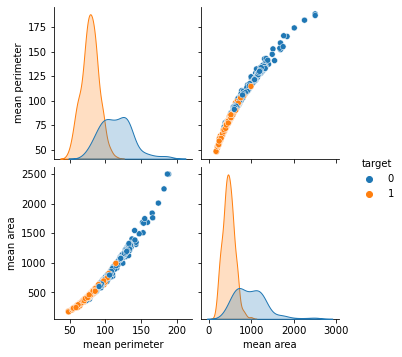

In [12]:
print("Here is the pairplot showing my chosen variables' relationship.")
my_choice_visuals = visuals(x_train_v1,y_train)

Here is the pairplot showing PCA chosen variables' relationship.


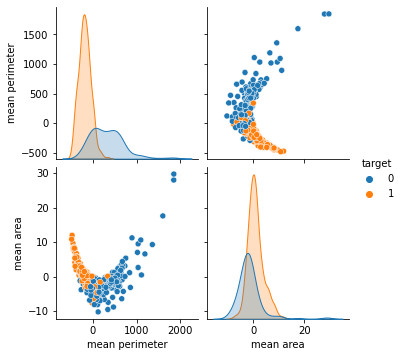

In [13]:
print("Here is the pairplot showing PCA chosen variables' relationship.")
pca_choice_visuals = visuals(x_train_pca,y_train)


In [18]:
def hypothesis_testing(x,y):
    # x and y are the variables you want to test for correlation
    corr, p_value = pearsonr(x, y)

    # print the correlation coefficient and p-value
    print("Correlation coefficient: ",corr)
    print("P-value: ",p_value)
    if p_value < 0.05:
        print("We will reject the null hypothesis that these variables do not have a relationship")
    else:
        print("We fail to reject the null hypothesis that these variables do not have a relationship")

In [19]:
print("This is the hypothesis test to see if my chosen variables (Mean area and mean perimeter) are related to the target variable Y.")
my_choice_test = hypothesis_testing(x_train_v1[:,1],y_train)



This is the hypothesis test to see if my chosen variables (Mean area and mean perimeter) are related to the target variable Y.
Correlation coefficient:  [-0.6951708957713856]
P-value:  6.111970541052042e-67
We will reject the null hypothesis that these variables do not have a relationship


# Conclusion
In conclusion, I believe that the variables mean and perimeter are better predictors for the 
maliginancy of a breast cancer tumor.